### Distance Metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

start_date = '1999-12-29'
end_date = '2024-03-06'
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'PYPL', 'ADBE', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'NFLX', 'COST', 'AMGN', 'AVGO', 'TXN', 'QCOM', 'GILD', 'SBUX'
]
price = pd.DataFrame()
for i in tickers :
    price = pd.concat([
        price, 
        yf.download(i, start=start_date, end=end_date)['Close']
    ], axis = 1)
price.columns = tickers
price.index = pd.to_datetime(price.index)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
price

,AAPL,MSFT,GOOGL,AMZN,PYPL,ADBE,INTC,CSCO,CMCSA,PEP,NFLX,COST,AMGN,AVGO,TXN,QCOM,GILD,SBUX
1999-12-29,0.898996,58.968750,NaN,4.175000,NaN,16.484375,41.937500,53.062500,16.604168,35.562500,NaN,45.437500,61.812500,NaN,53.093750,82.375000,1.691406,3.085938
1999-12-30,0.895647,58.812500,NaN,3.953125,NaN,16.500000,41.843750,53.093750,16.083332,35.500000,NaN,45.656250,64.875000,NaN,49.687500,80.875000,1.703125,3.015625
1999-12-31,0.917969,58.375000,NaN,3.806250,NaN,16.812500,41.156250,53.562500,15.958333,35.250000,NaN,45.625000,60.062500,NaN,48.312500,88.062500,1.691406,3.031250
2000-01-03,0.999442,58.281250,NaN,4.468750,NaN,16.390625,43.500000,54.031250,15.583333,36.875000,NaN,44.500000,62.937500,NaN,51.437500,89.656250,1.759766,3.082031
2000-01-04,0.915179,56.312500,NaN,4.096875,NaN,15.015625,41.468750,51.000000,14.416667,35.937500,NaN,42.062500,58.125000,NaN,49.250000,81.031250,1.679688,2.984375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,181.419998,407.720001,136.380005,173.160004,60.250000,551.820007,41.990002,48.060001,42.150002,167.029999,596.479980,747.960022,277.459991,1289.420044,163.039993,155.850006,72.699997,93.000000
2024-02-29,180.750000,413.640015,138.460007,176.759995,60.340000,560.280029,43.049999,48.369999,42.849998,165.339996,602.919983,743.890015,273.829987,1300.489990,167.330002,157.789993,72.099998,94.900002
2024-03-01,179.660004,415.500000,137.139999,178.220001,60.540001,570.929993,43.820000,48.400002,42.799999,164.589996,619.340027,749.440002,280.329987,1399.170044,171.050003,163.089996,72.309998,93.160004
2024-03-04,175.100006,414.920013,133.350006,177.580002,59.980000,567.940002,45.610001,49.130001,41.849998,165.369995,615.830017,759.179993,279.390015,1402.260010,172.440002,166.559998,72.250000,92.459999


In [4]:
price.dropna(inplace=True)

In [5]:
ret = price.pct_change().dropna()

In [6]:
ret_test = ret['2020-01' :]
ret = ret[: '2019-12']

### 상관계수

Text(0.5, 1.0, 'Correlation')

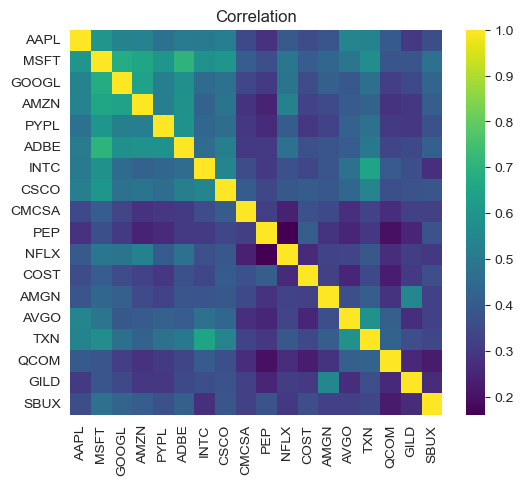

In [7]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    ret.corr(), annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation')

### 상관계수 기반 척도

$$\begin{matrix}
d(x,y) & = & \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \\
& = & \sqrt{\sum_{i=1}^{n} x_i^2 - 2x_iy_i + y_i^2}  = \sqrt{T + T - 2T\sigma(x,y)} \\
& = & \sqrt{2T(1 - \rho(x,y))} = \sqrt{4T}d_{\rho}(x,y)
\end{matrix}$$

In [8]:
from FinancialMachineLearning.metrics.distance import DistanceDataFrame

In [9]:
metrics = DistanceDataFrame(ret)

In [10]:
corr_dist_metric = metrics.corr_based_distance()

Text(0.5, 1.0, 'Correlation based Distance')

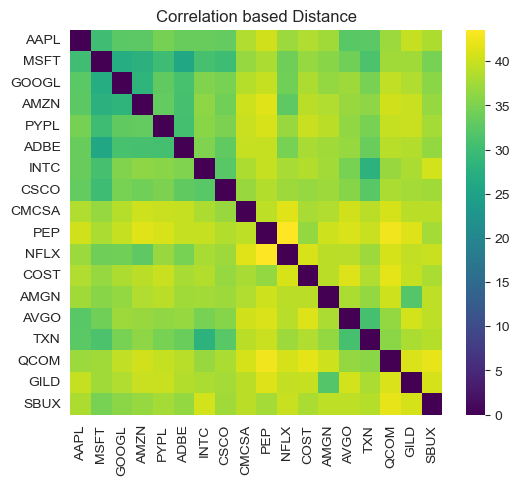

In [11]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    corr_dist_metric, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Correlation based Distance')

#### Jensen-Shannon Divergence

$$
D_{KL}(P||Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

In [12]:
jsd = metrics.jensen_shannon_divergence()

Text(0.5, 1.0, 'Jensen-Shannon Divergence')

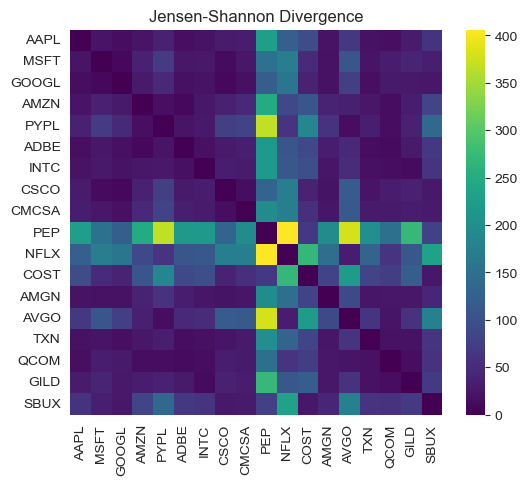

In [13]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    jsd, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Jensen-Shannon Divergence')

#### Variational Information

In [14]:
vi = metrics.variational_information()

Text(0.5, 1.0, 'Variational Information')

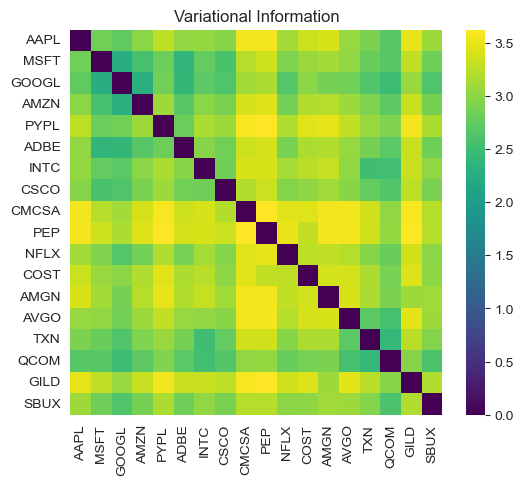

In [15]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    vi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Variational Information')

#### Mutual Information

In [16]:
mi = metrics.mutual_information()

Text(0.5, 1.0, 'Mutual Information')

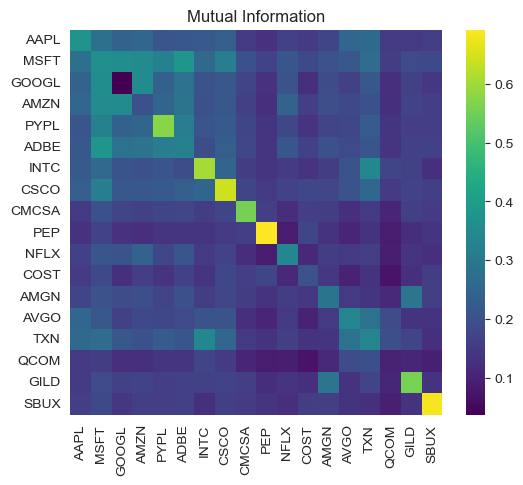

In [17]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.heatmap(
    mi, annot = False, cmap = 'viridis', ax = ax
)
plt.title('Mutual Information')

In [18]:
from scipy.optimize import minimize

def markowitz_optimization(returns, distance_matrix, target_return):
    n = distance_matrix.shape[0]
    initial_weights = np.ones(n) / n

    def portfolio_risk(weights):
        weighted_distance = np.dot(weights.T, np.dot(distance_matrix, weights))
        return np.sqrt(weighted_distance)

    def target_return_constraint(weights):
        return target_return - np.dot(weights, returns)

    def weight_sum_constraint(weights):
        return np.sum(weights) - 1

    constraints = [{'type': 'eq', 'fun': weight_sum_constraint},
                   {'type': 'eq', 'fun': target_return_constraint}]

    bounds = tuple((0, 1) for _ in range(n))

    result = minimize(portfolio_risk, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    result = pd.Series(result.x, index = returns.index)

    return result

In [30]:
def generate_random_portfolios(returns, distance_matrix, num_portfolios=5000):
    n = returns.shape[1]  
    mean_returns = returns.mean()  
    portfolio_returns = []
    portfolio_volatility = []
    for _ in range(num_portfolios):
        weights = np.random.random(n)
        weights /= np.sum(weights)
        
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_returns.append(portfolio_return)
        
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        portfolio_volatility.append(portfolio_std)

    portfolios = pd.DataFrame({
        'Return': portfolio_returns,
        'Volatility': portfolio_volatility
    })
    
    return portfolios

def find_optimal_portfolio(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def neg_sharpe_ratio(weights):
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_var = np.dot(weights.T, np.dot(distance_matrix, weights))
        portfolio_std = np.sqrt(portfolio_var)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
        return -sharpe_ratio 

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(neg_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index = returns.columns, name = 'weight')
    optimal_return = np.dot(optimal_weights, mean_returns)
    return optimal_weights, optimal_return

def find_optimal_portfolio_entropy_maximization(returns, distance_matrix, risk_free_rate=0.0):
    n = returns.shape[1]
    mean_returns = returns.mean()

    def min_negative_entropy_based_measure(weights):
        diversity_measure = np.dot(weights.T, np.dot(distance_matrix, weights))
        return -diversity_measure

    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.ones(n) / n

    result = minimize(min_negative_entropy_based_measure, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    optimal_weights = result.x
    optimal_weights = pd.Series(optimal_weights, index=returns.columns, name='weight')
    
    optimal_diversity_measure = -min_negative_entropy_based_measure(optimal_weights)

    return optimal_weights, optimal_diversity_measure

In [31]:
portfolio_mi = generate_random_portfolios(ret, mi, num_portfolios = 5000)
optimal_weight_mi, optimal_return_mi = find_optimal_portfolio_entropy_maximization(ret, mi)

In [32]:
optimal_return_mi

0.6418880018655585

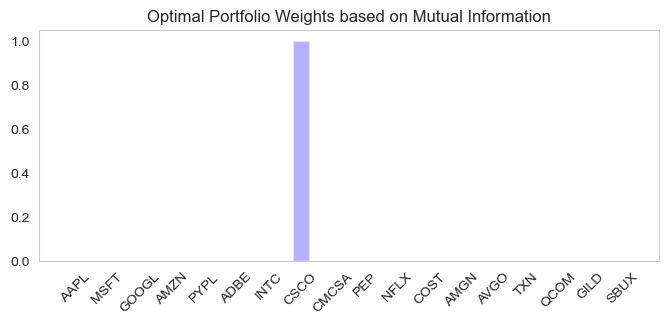

In [33]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_mi.index, optimal_weight_mi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Mutual Information')
plt.show()

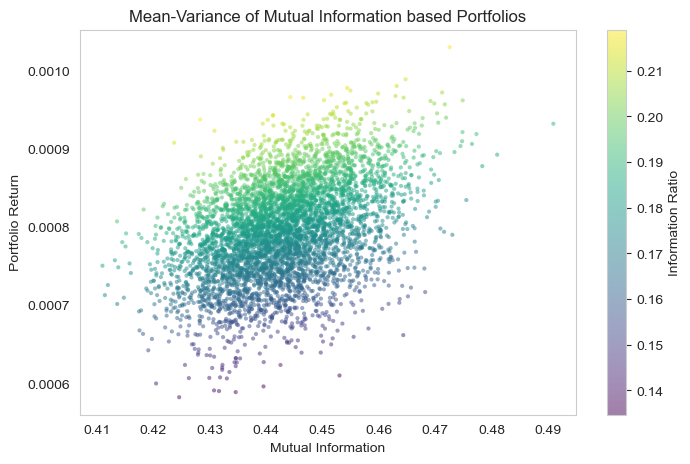

In [34]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_mi['Volatility'], 
    portfolio_mi['Return'], 
    c = (portfolio_mi['Return'] / portfolio_mi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Mutual Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Mutual Information based Portfolios')
plt.show()

In [35]:
portfolio_vi = generate_random_portfolios(ret, vi, num_portfolios = 5000)
optimal_weight_vi, optimal_return_vi = find_optimal_portfolio_entropy_maximization(ret, vi)

In [36]:
optimal_return_vi

3.068191480762777

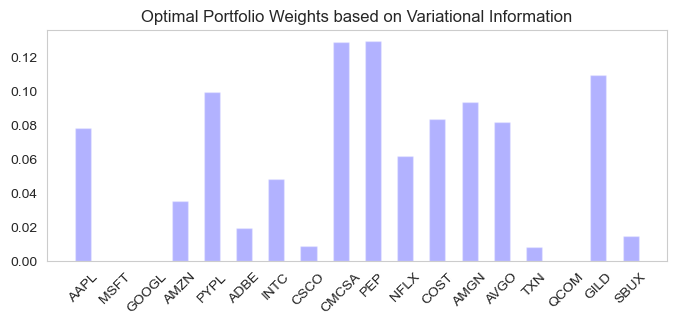

In [37]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_vi.index, optimal_weight_vi, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Variational Information')
plt.show()

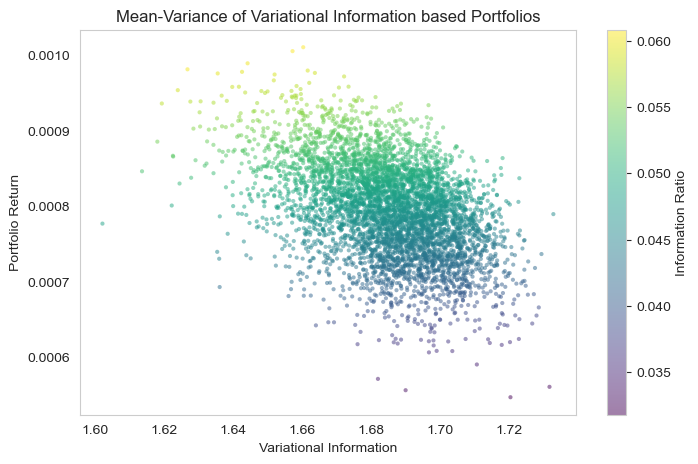

In [38]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_vi['Volatility'], 
    portfolio_vi['Return'], 
    c = (portfolio_vi['Return'] / portfolio_vi['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Variational Information')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Variational Information based Portfolios')
plt.show()

In [39]:
portfolio_jsd = generate_random_portfolios(ret, jsd, num_portfolios = 5000)
optimal_weight_jsd, optimal_return_jsd = find_optimal_portfolio_entropy_maximization(ret, jsd)

In [40]:
optimal_return_jsd

204.2784693363421

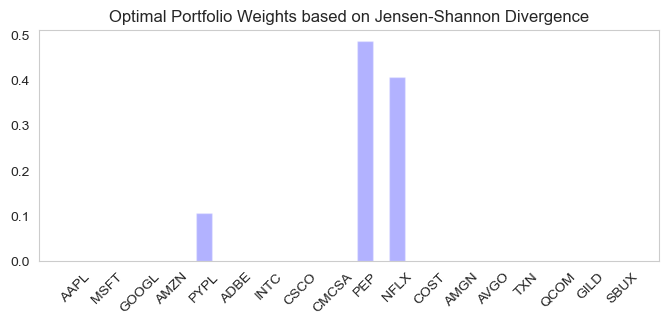

In [41]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_jsd.index, optimal_weight_jsd, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Jensen-Shannon Divergence')
plt.show()

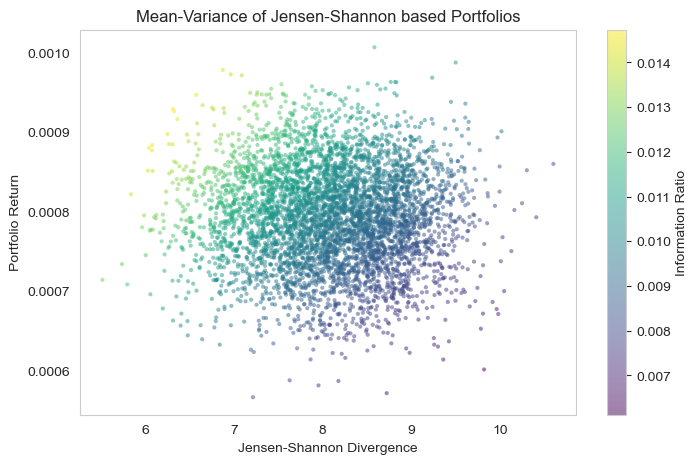

In [42]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_jsd['Volatility'], 
    portfolio_jsd['Return'], 
    c = (portfolio_jsd['Return'] / portfolio_jsd['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Jensen-Shannon Divergence')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Jensen-Shannon based Portfolios')
plt.show()

In [44]:
portfolio_corr_dist = generate_random_portfolios(ret, corr_dist_metric, num_portfolios = 5000)

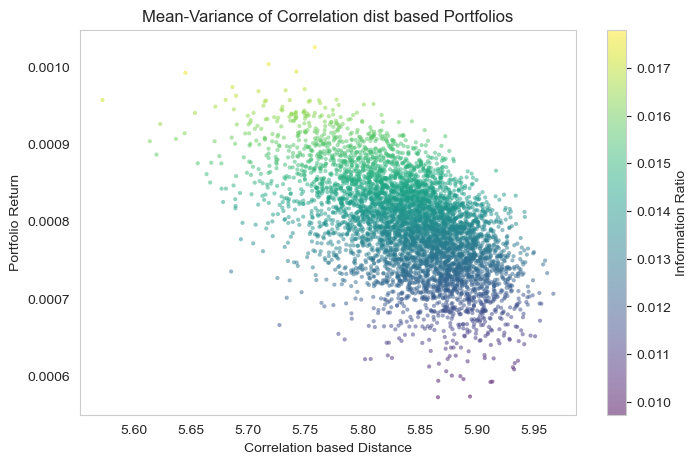

In [45]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr_dist['Volatility'], 
    portfolio_corr_dist['Return'], 
    c = (portfolio_corr_dist['Return'] / portfolio_corr_dist['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation based Distance')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation dist based Portfolios')
plt.show()

In [46]:
portfolio_corr = generate_random_portfolios(ret, ret.corr(), num_portfolios = 5000)
optimal_weight_corr_dist, optimal_return_corr_dist = find_optimal_portfolio(ret, ret.corr())

In [47]:
optimal_return_corr_dist

0.001275065808261418

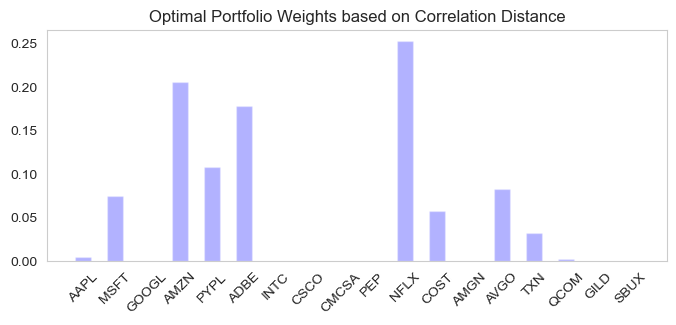

In [48]:
plt.figure(figsize = (8, 3))
plt.bar(
    optimal_weight_corr_dist.index, optimal_weight_corr_dist, color = 'b', alpha = 0.3, label = 'Optimal Portfolio', width = 0.5
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights based on Correlation Distance')
plt.show()

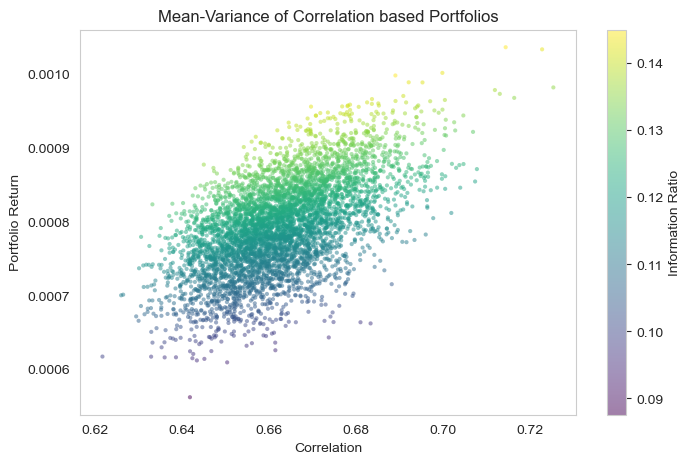

In [49]:
plt.figure(figsize = (8, 5))
plt.scatter(
    portfolio_corr['Volatility'], 
    portfolio_corr['Return'], 
    c = (portfolio_corr['Return'] / portfolio_corr['Volatility']) * 100, 
    marker = '.',
    cmap = 'viridis',
    alpha = 0.5,
    edgecolors = 'none'
)
plt.grid(False)
plt.colorbar(label = 'Information Ratio')
plt.xlabel('Correlation')
plt.ylabel('Portfolio Return')
plt.title('Mean-Variance of Correlation based Portfolios')
plt.show()

In [50]:
return_comparison = [optimal_return_corr_dist, optimal_return_jsd, optimal_return_vi, optimal_return_mi]
weight_comparison = pd.DataFrame(
    [optimal_weight_corr_dist, optimal_weight_jsd, optimal_weight_vi, optimal_weight_mi], 
    index = ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']
)

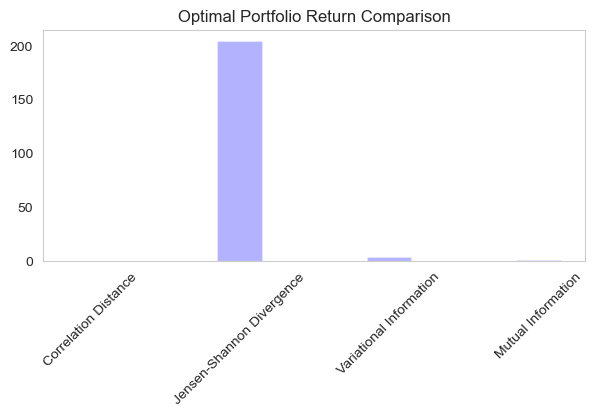

In [51]:
plt.figure(figsize = (7, 3))
plt.bar(
    ['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'], 
    return_comparison, 
    color = 'b', 
    alpha = 0.3, 
    label = 'Optimal Portfolio', 
    width = 0.3
)
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Return Comparison')
plt.show()

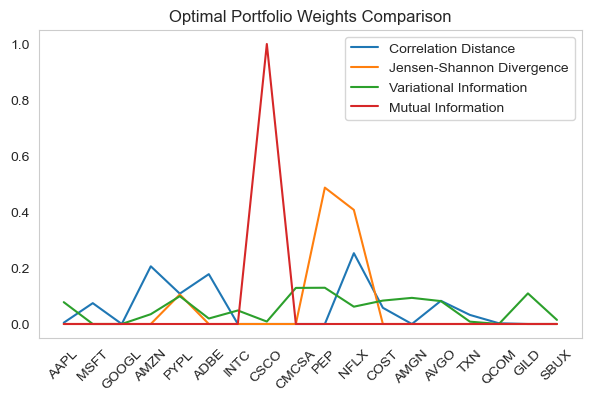

In [52]:
plt.figure(figsize = (7, 4))
plt.plot(
    weight_comparison.T
)
plt.legend([
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
])
plt.grid(False)
plt.xticks(rotation = 45)
plt.title('Optimal Portfolio Weights Comparison')
plt.show()

#### Backtesting

In [53]:
import quantstats as qs

In [54]:
backtest = pd.DataFrame()
backtest = pd.concat(
    [
        backtest, 
        (ret_test * optimal_weight_corr_dist).sum(axis = 1),
        (ret_test * optimal_weight_jsd).sum(axis = 1),
        (ret_test * optimal_weight_vi).sum(axis = 1),
        (ret_test * optimal_weight_mi).sum(axis = 1)
    ], axis = 1
)
backtest.columns = [
    'Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information'
]

In [55]:
backtest.index = pd.to_datetime(backtest.index)

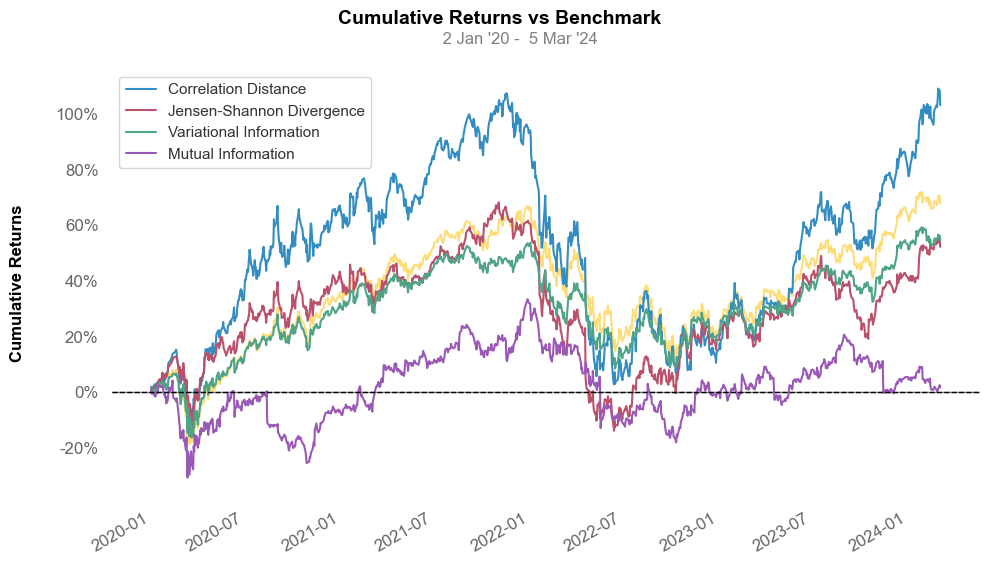

In [56]:
plt.rcParams["axes.grid"] = False  # 모든 플롯에 대해 그리드 비활성화
qs.plots.returns(
    backtest,
    benchmark = ret_test.mean(axis = 1),
)

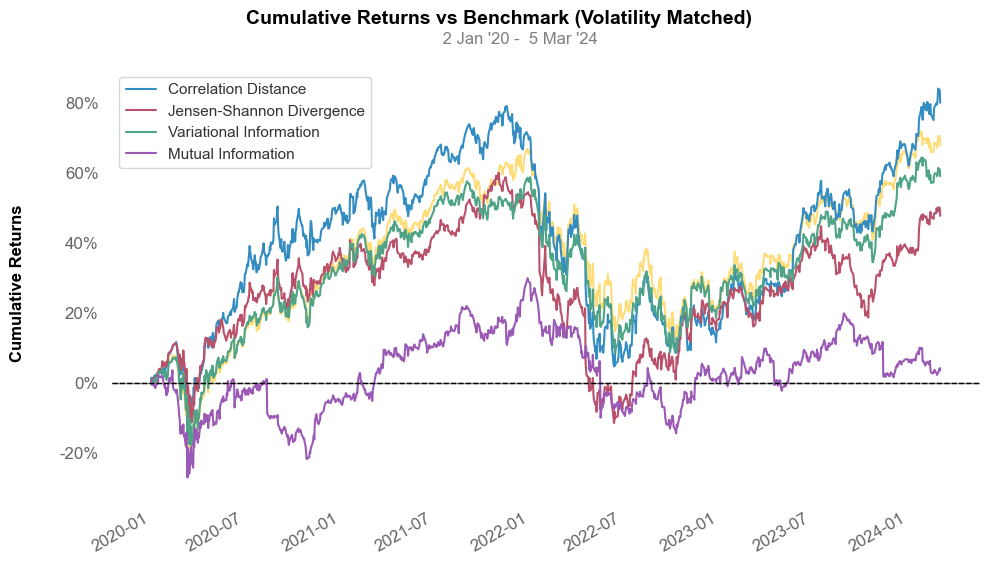

In [57]:
qs.plots.returns(
    backtest[['Correlation Distance', 'Jensen-Shannon Divergence', 'Variational Information', 'Mutual Information']],
    benchmark = ret_test.mean(axis = 1),
    match_volatility = True
)

In [58]:
qs.reports.metrics(backtest, benchmark = ret_test.mean(axis = 1))

                    Benchmark    Correlation Distance    Jensen-Shannon Divergence    Variational Information    Mutual Information
------------------  -----------  ----------------------  ---------------------------  -------------------------  --------------------
Start Period        2020-01-02   2020-01-02              2020-01-02                   2020-01-02                 2020-01-02
End Period          2024-03-05   2024-03-05              2024-03-05                   2024-03-05                 2024-03-05
Risk-Free Rate      0.0%         0.0%                    0.0%                         0.0%                       0.0%
Time in Market      100.0%       100.0%                  100.0%                       100.0%                     100.0%

Cumulative Return   67.79%       103.18%                 52.17%                       54.47%                     1.73%
CAGR﹪              8.94%        12.44%                  7.19%                        7.46%                      0.28%

Sharpe   

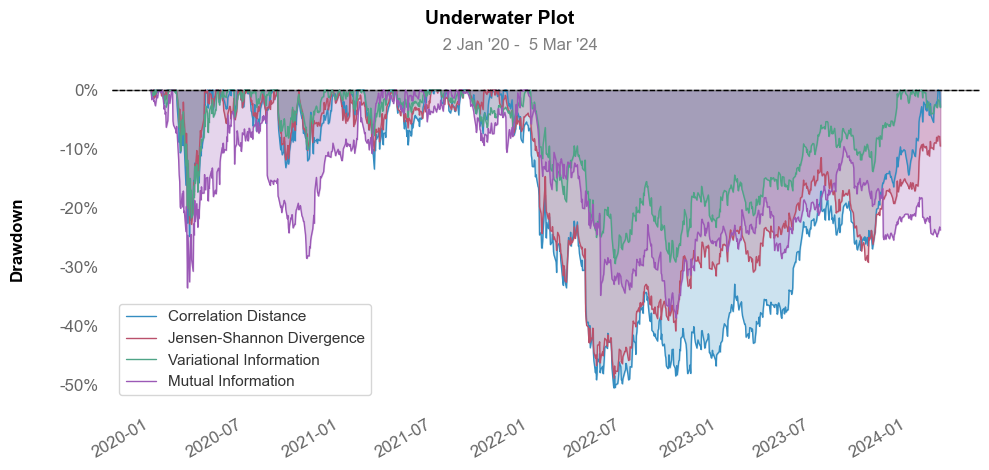

In [59]:
qs.plots.drawdown(backtest)

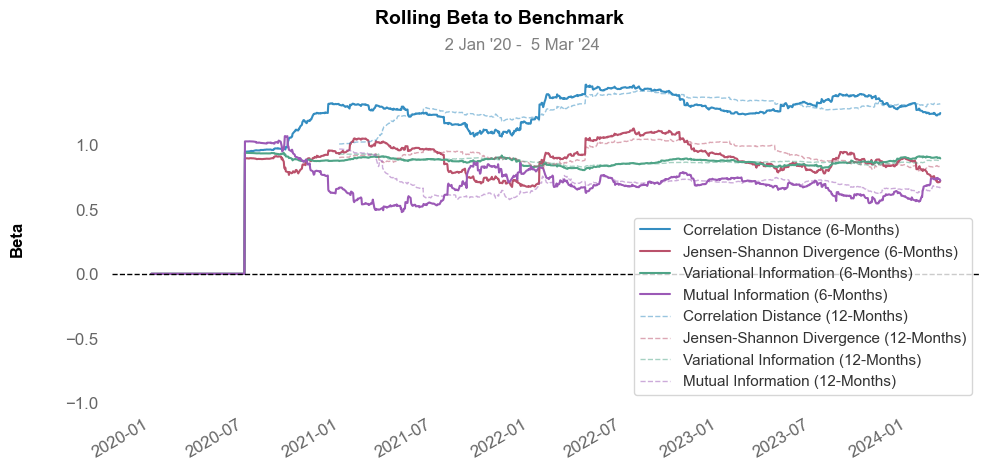

In [60]:
qs.plots.rolling_beta(backtest, ret_test.mean(axis = 1), figsize = (10, 5))

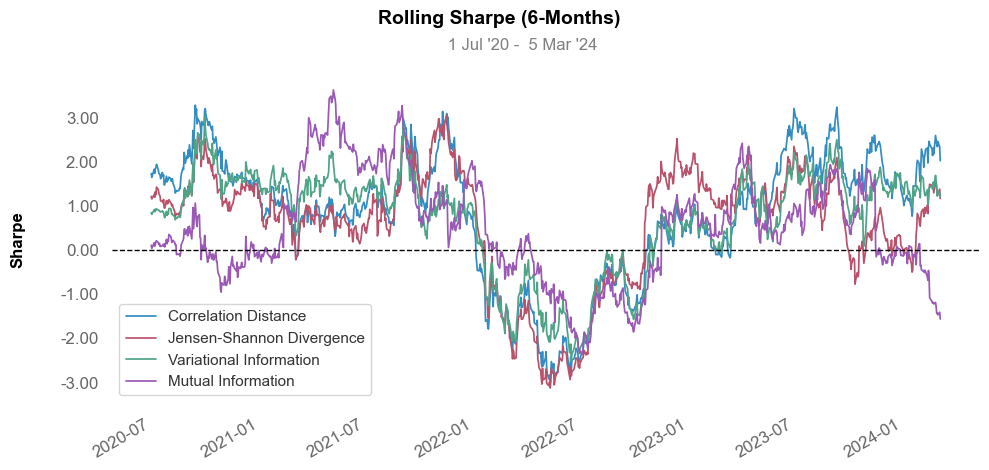

In [61]:
qs.plots.rolling_sharpe(backtest, figsize = (10, 5))

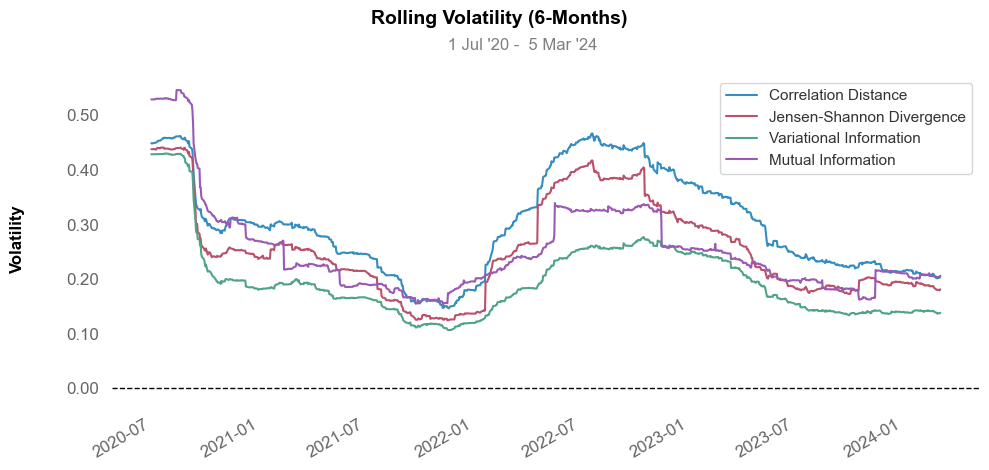

In [62]:
qs.plots.rolling_volatility(backtest, figsize = (10, 5))

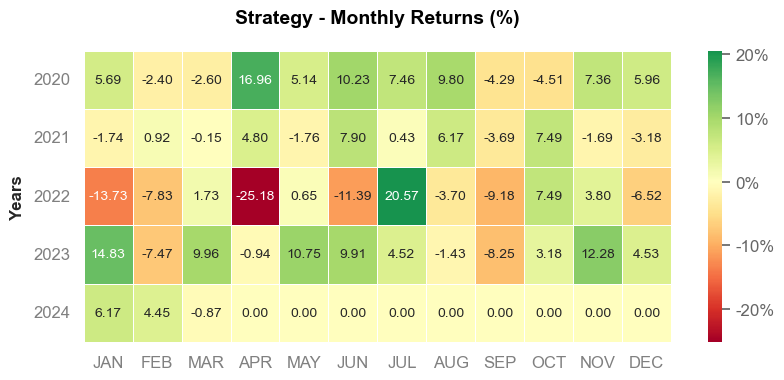

In [63]:
qs.plots.monthly_returns(backtest['Correlation Distance'], figsize = (8, 4))

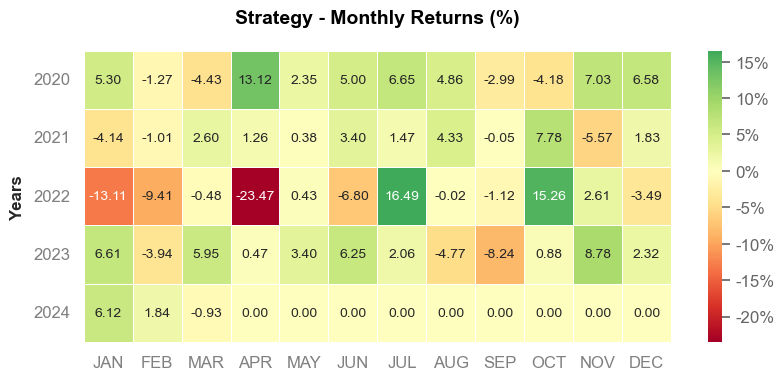

In [64]:
qs.plots.monthly_returns(backtest['Jensen-Shannon Divergence'], figsize = (8, 4))

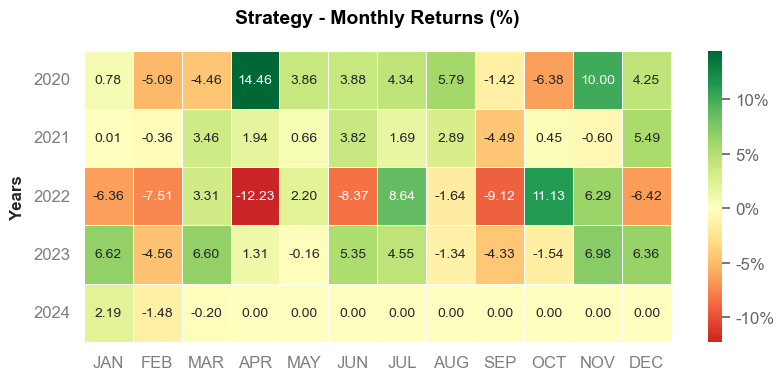

In [65]:
qs.plots.monthly_returns(backtest['Variational Information'], figsize = (8, 4))

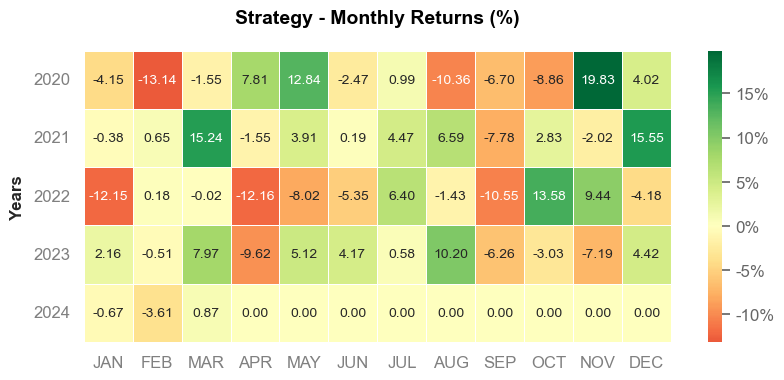

In [66]:
qs.plots.monthly_returns(backtest['Mutual Information'], figsize = (8, 4))

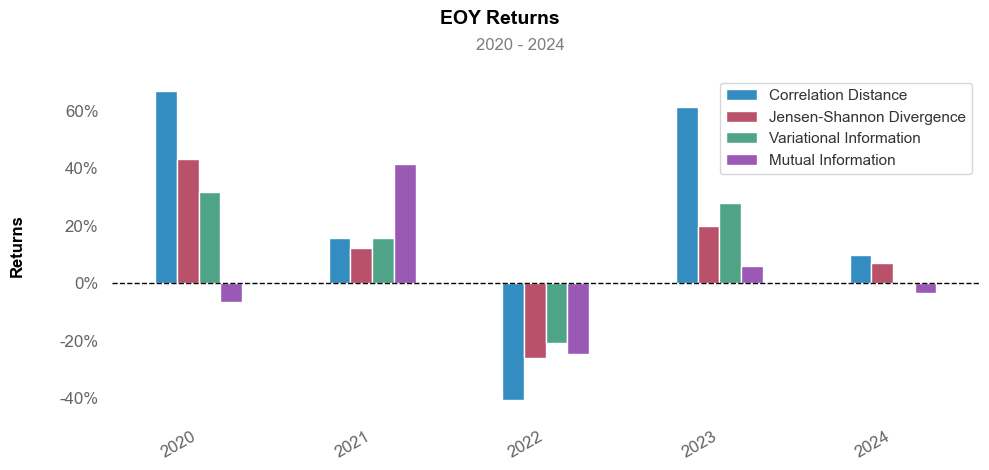

In [67]:
qs.plots.yearly_returns(
    returns = backtest,
)